### Import Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Open Files, Create DataFrames, Zero Null Values
#### *To keep nulls, comment 3rd var, remove "n" from dataframe var.

In [2]:
test = pd.read_csv("test.csv")
tsn = pd.DataFrame(test)
ts = tsn.fillna(0)

train = pd.read_csv("train.csv")
trn = pd.DataFrame(train)
tr = trn.fillna(0)

### Convert "LastRecord" and "Date Deployed" to Datetime

In [3]:
ts["LastRecord"], ts["Date Deployed"] = pd.to_datetime(ts["LastRecord"]), pd.to_datetime(ts["Date Deployed"])
tr["LastRecord"], tr["Date Deployed"] = pd.to_datetime(tr["LastRecord"]), pd.to_datetime(tr["Date Deployed"])

### Create "DaysInService" Column, Convert from TimeDelta to Float for Plotting

In [4]:
ts["DaysInService"] = ts["LastRecord"] - ts["Date Deployed"]
ts["DaysInService"] = ts["DaysInService"].dt.days.astype("float64")
tr["DaysInService"] = tr["LastRecord"] - tr["Date Deployed"]
tr["DaysInService"] = tr["DaysInService"].dt.days.astype("float64")

### Get Info and Head

In [5]:
#ts.info()
#ts.head()

#tr.info()
#tr.head()

### Count Null Values
#### *Keep nulls above to observe progressive linearity.

In [6]:
#ts.isnull().sum()

#tr.isnull().sum()

### Plot Distributions of DataFrame Columns
#### *no plot for "deviceid" (irrelevant) or "charge_cycle_time_below_12" (bool)

In [7]:
"""
for col in ts.columns[1:]:
    if col != "charge_cycle_time_below_12":
        hist = ts[col].hist(bins=10)
        print("Plot for column \"{}\"".format(col))
        plt.show()
"""

"""
for col in tr.columns[1:]:
    if col != "charge_cycle_time_below_12":
        hist = tr[col].hist(bins=10)
        print("Plot for column \"{}\"".format(col))
        plt.show()
"""

'\nfor col in tr.columns[1:]:\n    if col != "charge_cycle_time_below_12":\n        hist = tr[col].hist(bins=10)\n        print("Plot for column "{}"".format(col))\n        plt.show()\n'

### Create New DataFrame, Using ONLY float64 values.

In [8]:
columns = [column for column in ts.columns if ts[column].dtype == "float64"]
tsno = ts[columns]

columns = [column for column in tr.columns if tr[column].dtype == "float64"]
trno = tr[columns]

### Convert Outliers by Quantile to Null in New DataFrame. (Test)

In [9]:
q_low = tsno[columns].quantile(0.01)
q_hi  = tsno[columns].quantile(0.99)

ts1 = tsno[(tsno[columns] < q_hi) & (tsno[columns] > q_low)]

#ts1.info()
#ts1.head()

### Convert Outliers by Quantile to Null in New DataFrame. (Train)

In [10]:
q_low = trno[columns].quantile(0.01)
q_hi  = trno[columns].quantile(0.99)

tr1 = trno[(trno[columns] < q_hi) & (trno[columns] > q_low)]

#tr1.info()
#tr1.head()

### Count New OUTLIER Null Values

In [11]:
#ts1.isnull().sum()
#tr1.isnull().sum()

### Plot New DataFrame Outlier Nulls

In [12]:
"""
for col in ts1.columns:
    hist = ts1[col].hist(bins=100)
    print("Plot for column \"{}\"".format(col))
    plt.show()
"""

"""
for col in tr1.columns:
    hist = tr1[col].hist(bins=100)
    print("Plot for column \"{}\"".format(col))
    plt.show()
"""

'\nfor col in tr1.columns:\n    hist = tr1[col].hist(bins=100)\n    print("Plot for column "{}"".format(col))\n    plt.show()\n'

### Rebuild DataFrames WITH Outlier Nulls for Feature Importance
#### *Adding ints, bools, and datetimes from original df

In [13]:
????

Object `??` not found.


# --- Feature Importance ---

In [14]:
tr.dtypes

deviceid                                int64
avg_time_charging_lag1                float64
avg_time_charging_lag2                float64
avg_time_charging_lag3                float64
avg_time_charging_lag7                float64
charging_rate_lag3                    float64
charging_rate_lag7                    float64
avg_time_discharging_lag1             float64
avg_time_discharging_lag2             float64
avg_time_discharging_lag3             float64
avg_time_discharging_lag7             float64
discharging_rate_lag3                 float64
discharging_rate_lag7                 float64
fail_7                                  int64
charge_cycle_time_below_12               bool
avg_time_charging_lag4                float64
avg_time_discharging_lag4             float64
avg_time_charging_lag5                float64
avg_time_discharging_lag5             float64
avg_time_charging_lag6                float64
avg_time_discharging_lag6             float64
avg_time_charging_lag8            

In [15]:
tr = pd.get_dummies(tr,drop_first=True,prefix_sep='_') 
tr.columns

Index(['deviceid', 'avg_time_charging_lag1', 'avg_time_charging_lag2',
       'avg_time_charging_lag3', 'avg_time_charging_lag7',
       'charging_rate_lag3', 'charging_rate_lag7', 'avg_time_discharging_lag1',
       'avg_time_discharging_lag2', 'avg_time_discharging_lag3',
       'avg_time_discharging_lag7', 'discharging_rate_lag3',
       'discharging_rate_lag7', 'fail_7', 'charge_cycle_time_below_12',
       'avg_time_charging_lag4', 'avg_time_discharging_lag4',
       'avg_time_charging_lag5', 'avg_time_discharging_lag5',
       'avg_time_charging_lag6', 'avg_time_discharging_lag6',
       'avg_time_charging_lag8', 'avg_time_discharging_lag8',
       'avg_time_charging_lag9', 'avg_time_discharging_lag9',
       'avg_time_charging_lag10', 'avg_time_discharging_lag10',
       'avg_time_charging_lag11', 'avg_time_discharging_lag11',
       'avg_time_charging_lag12', 'avg_time_discharging_lag12',
       'avg_time_charging_lag13', 'avg_time_discharging_lag13',
       'avg_time_charging_

In [16]:
predictors = ['deviceid', 'avg_time_charging_lag1', 'avg_time_charging_lag2',
       'avg_time_charging_lag3', 'avg_time_charging_lag7',
       'charging_rate_lag3', 'charging_rate_lag7', 'avg_time_discharging_lag1',
       'avg_time_discharging_lag2', 'avg_time_discharging_lag3',
       'avg_time_discharging_lag7', 'discharging_rate_lag3',
       'discharging_rate_lag7', 'charge_cycle_time_below_12',
       'avg_time_charging_lag4', 'avg_time_discharging_lag4',
       'avg_time_charging_lag5', 'avg_time_discharging_lag5',
       'avg_time_charging_lag6', 'avg_time_discharging_lag6',
       'avg_time_charging_lag8', 'avg_time_discharging_lag8',
       'avg_time_charging_lag9', 'avg_time_discharging_lag9',
       'avg_time_charging_lag10', 'avg_time_discharging_lag10',
       'avg_time_charging_lag11', 'avg_time_discharging_lag11',
       'avg_time_charging_lag12', 'avg_time_discharging_lag12',
       'avg_time_charging_lag13', 'avg_time_discharging_lag13',
       'avg_time_charging_lag14', 'avg_time_discharging_lag14',
       'discharging_rate_lag4', 'discharging_rate_lag5',
       'discharging_rate_lag6', 'discharging_rate_lag8', 'charging_rate_lag4',
       'charging_rate_lag5', 'charging_rate_lag6', 'chargecycles',
       'dischargecycles', 'total_off_time', 'number_times_restart',
       'avg_volt_change_charging', 'avg_volt_change_discharging',
       'avg_time_charging', 'avg_time_discharging', 'max_voltage_day',
       'piececount', 'cycle_time',
       'DaysInService']
outcome = 'fail_7'

In [17]:
X = tr[predictors]
y = tr[outcome]
X.shape

(40500, 53)

In [18]:
import numpy as np
from sklearn.model_selection import train_test_split
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1)

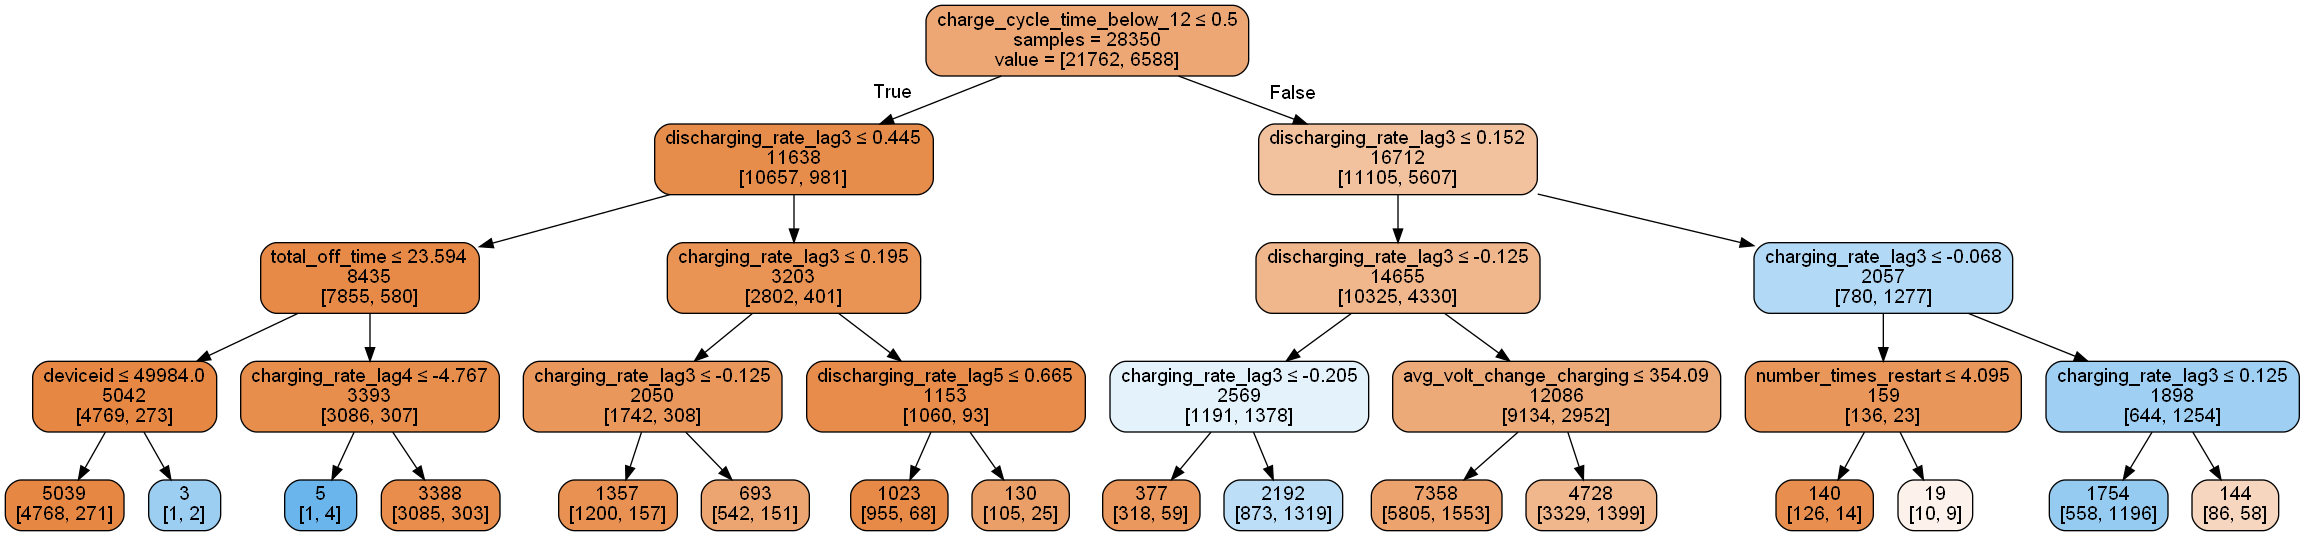

In [19]:
from sklearn.tree import DecisionTreeClassifier
from dmba import plotDecisionTree

DecisionTree = DecisionTreeClassifier(max_depth = 4)
DecisionTree.fit(train_X, train_y)

plotDecisionTree(DecisionTree, feature_names=train_X.columns)

In [20]:
importances = DecisionTree.feature_importances_

im = pd.DataFrame({'feature': train_X.columns, 'importance': importances})
im = im.sort_values('importance',ascending=False)
print(im)

                        feature  importance
13   charge_cycle_time_below_12    0.448717
11        discharging_rate_lag3    0.392954
5            charging_rate_lag3    0.125991
45     avg_volt_change_charging    0.021470
43               total_off_time    0.002775
38           charging_rate_lag4    0.002613
44         number_times_restart    0.002421
35        discharging_rate_lag5    0.001893
0                      deviceid    0.001167
39           charging_rate_lag5    0.000000
34        discharging_rate_lag4    0.000000
33   avg_time_discharging_lag14    0.000000
32      avg_time_charging_lag14    0.000000
31   avg_time_discharging_lag13    0.000000
30      avg_time_charging_lag13    0.000000
36        discharging_rate_lag6    0.000000
37        discharging_rate_lag8    0.000000
42              dischargecycles    0.000000
40           charging_rate_lag6    0.000000
41                 chargecycles    0.000000
28      avg_time_charging_lag12    0.000000
46  avg_volt_change_discharging 

In [21]:
for feat in tr.columns:
    print(feat)
    print(tr.groupby('fail_7')[feat].mean())
    #plt.show()

deviceid
fail_7
0    27541.526287
1    27410.692054
Name: deviceid, dtype: float64
avg_time_charging_lag1
fail_7
0    16.398083
1    15.867142
Name: avg_time_charging_lag1, dtype: float64
avg_time_charging_lag2
fail_7
0    16.551329
1    16.422707
Name: avg_time_charging_lag2, dtype: float64
avg_time_charging_lag3
fail_7
0    16.293708
1    16.223838
Name: avg_time_charging_lag3, dtype: float64
avg_time_charging_lag7
fail_7
0    16.273409
1    16.510465
Name: avg_time_charging_lag7, dtype: float64
charging_rate_lag3
fail_7
0   -0.054242
1   -0.007490
Name: charging_rate_lag3, dtype: float64
charging_rate_lag7
fail_7
0   -0.050990
1   -0.059656
Name: charging_rate_lag7, dtype: float64
avg_time_discharging_lag1
fail_7
0    26.045640
1    24.991407
Name: avg_time_discharging_lag1, dtype: float64
avg_time_discharging_lag2
fail_7
0    26.412394
1    26.158959
Name: avg_time_discharging_lag2, dtype: float64
avg_time_discharging_lag3
fail_7
0    25.958540
1    25.721961
Name: avg_time_dischar

DataError: No numeric types to aggregate

In [ ]:
for feat in tr.columns:
    print(feat)
    print(tr.groupby('fail_7')[feat].mean())
    #plt.show()

deviceid


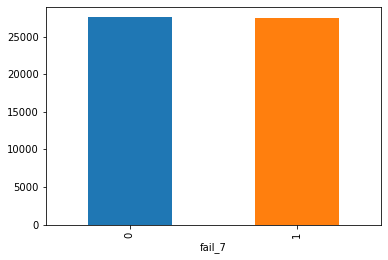

avg_time_charging_lag1


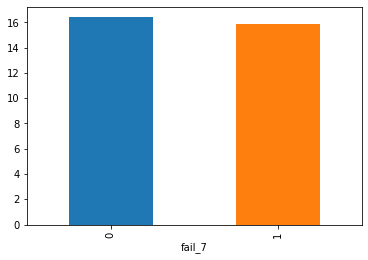

avg_time_charging_lag2


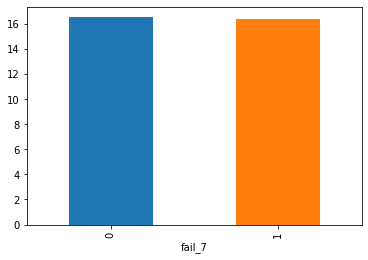

avg_time_charging_lag3


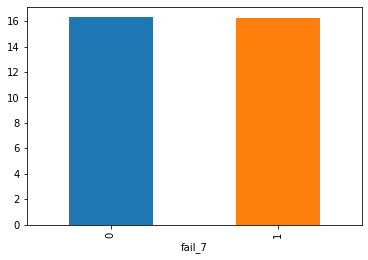

avg_time_charging_lag7


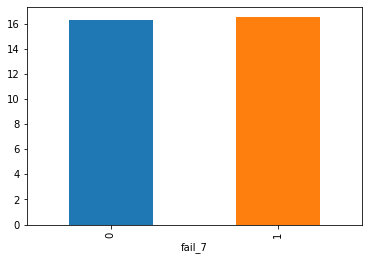

charging_rate_lag3


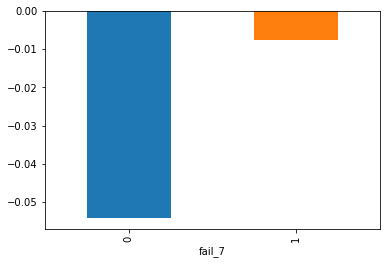

charging_rate_lag7


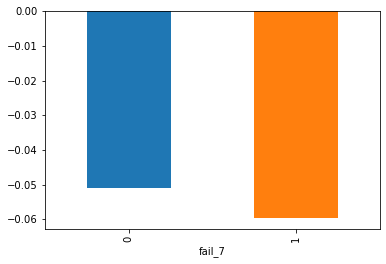

avg_time_discharging_lag1


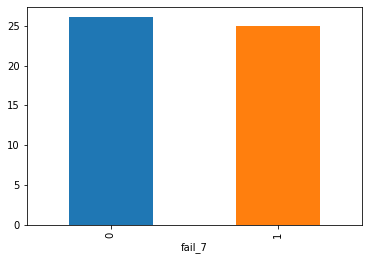

avg_time_discharging_lag2


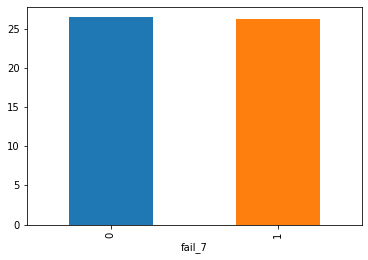

avg_time_discharging_lag3


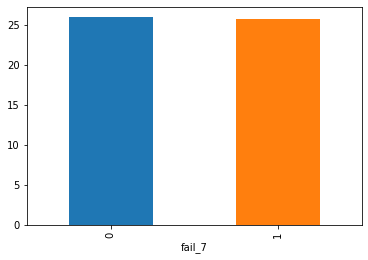

avg_time_discharging_lag7


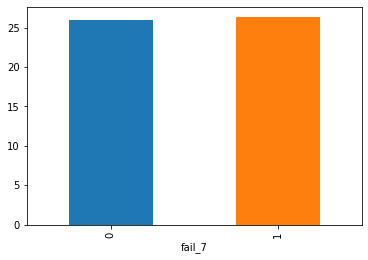

discharging_rate_lag3


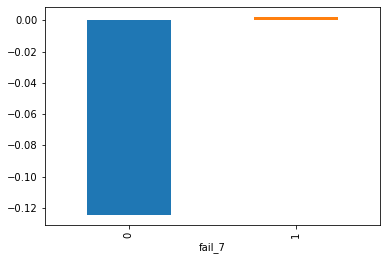

discharging_rate_lag7


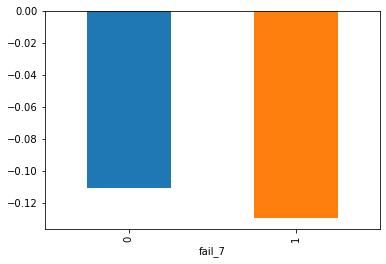

fail_7


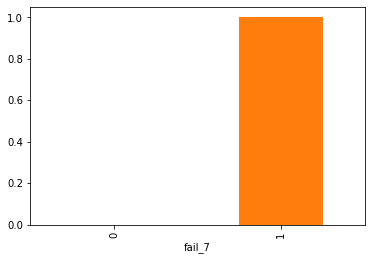

charge_cycle_time_below_12


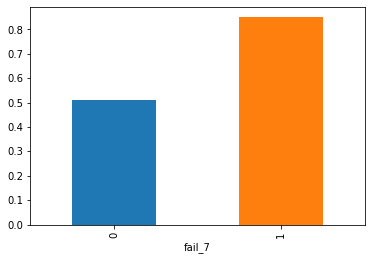

avg_time_charging_lag4


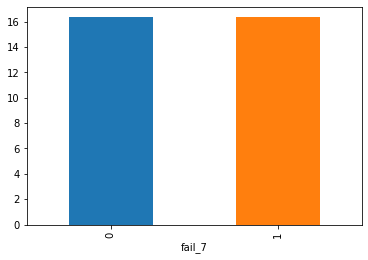

avg_time_discharging_lag4


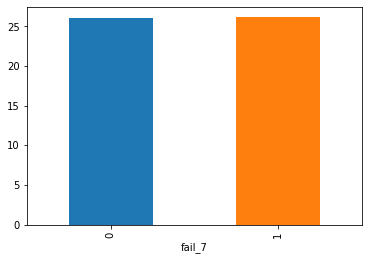

avg_time_charging_lag5


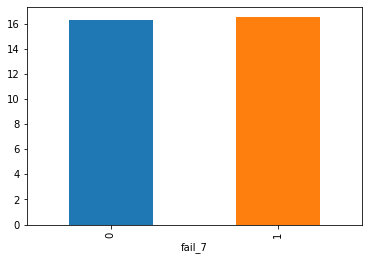

avg_time_discharging_lag5


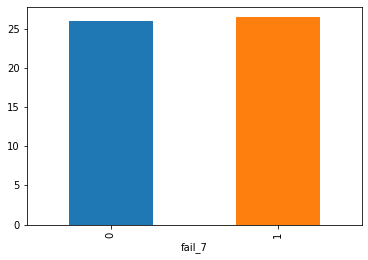

avg_time_charging_lag6


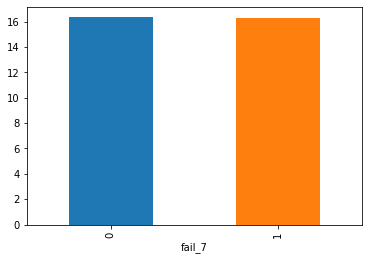

avg_time_discharging_lag6


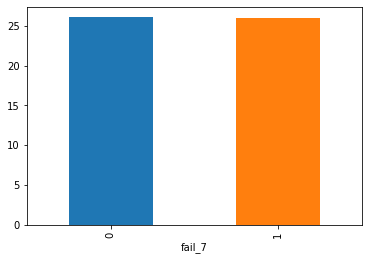

avg_time_charging_lag8


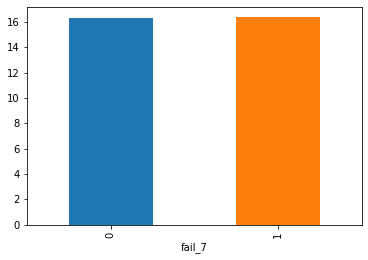

avg_time_discharging_lag8


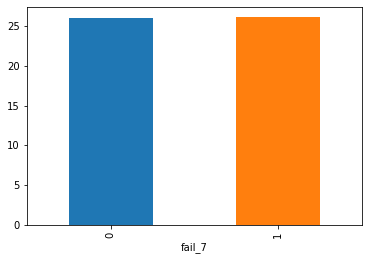

avg_time_charging_lag9


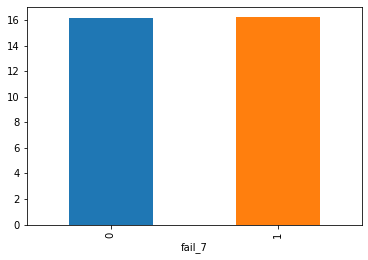

avg_time_discharging_lag9


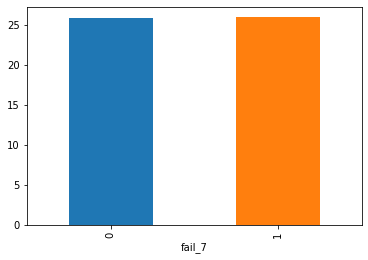

avg_time_charging_lag10


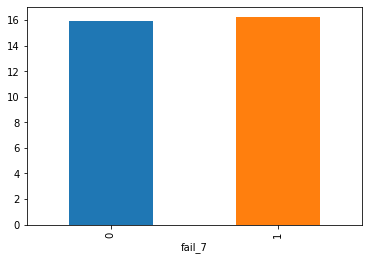

avg_time_discharging_lag10


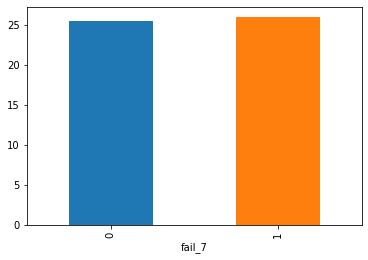

avg_time_charging_lag11


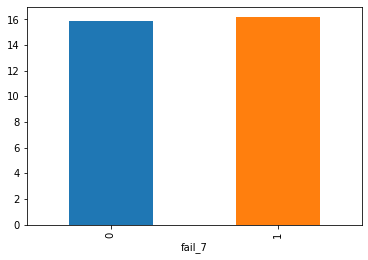

avg_time_discharging_lag11


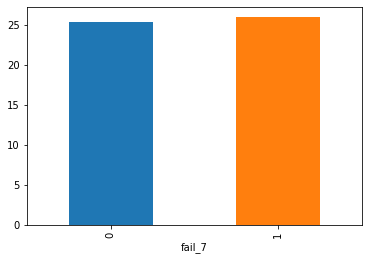

avg_time_charging_lag12


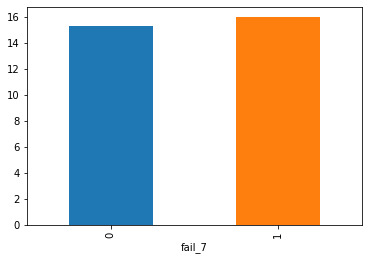

avg_time_discharging_lag12


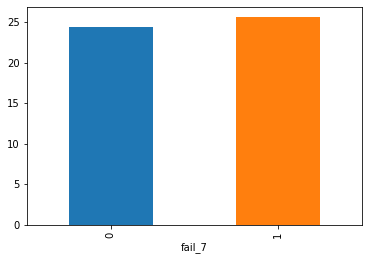

avg_time_charging_lag13


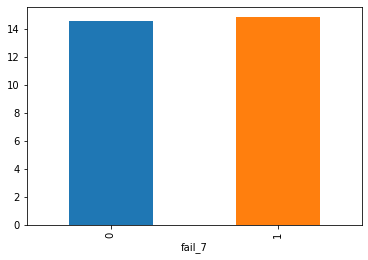

avg_time_discharging_lag13


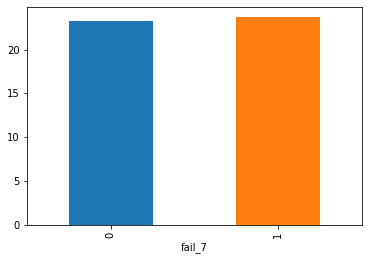

avg_time_charging_lag14


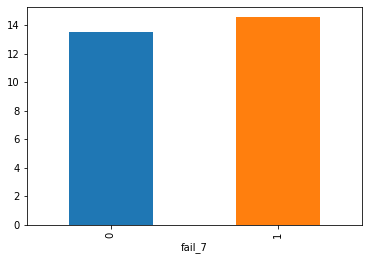

avg_time_discharging_lag14


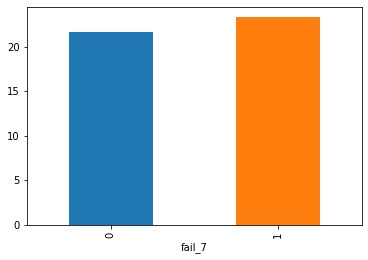

discharging_rate_lag4


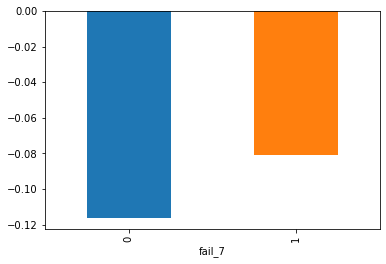

discharging_rate_lag5


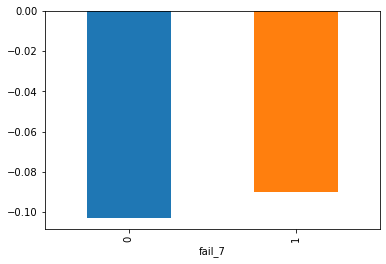

discharging_rate_lag6


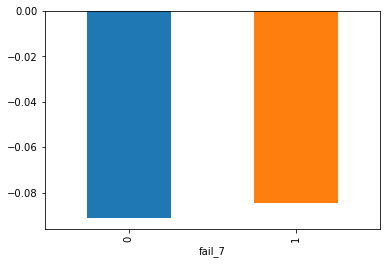

discharging_rate_lag8


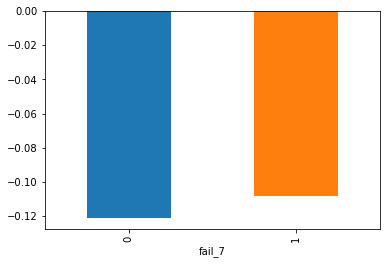

charging_rate_lag4


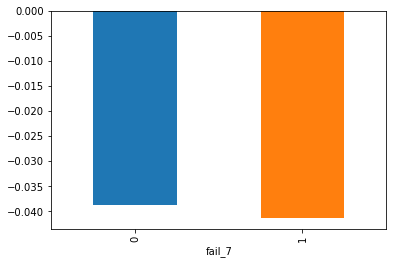

charging_rate_lag5


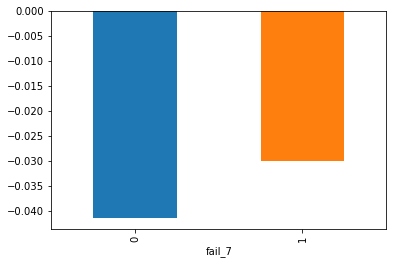

charging_rate_lag6


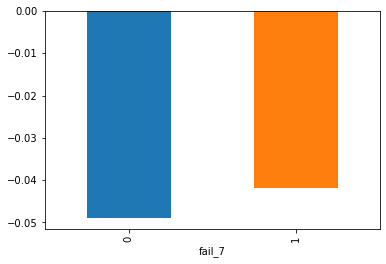

chargecycles


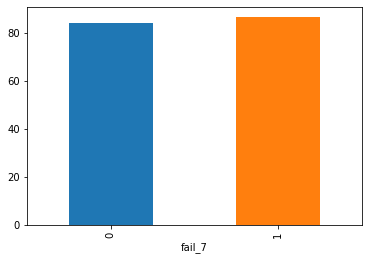

dischargecycles


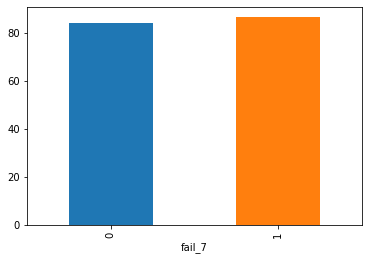

total_off_time


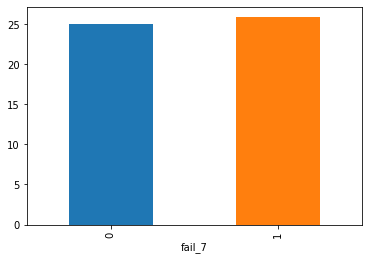

number_times_restart


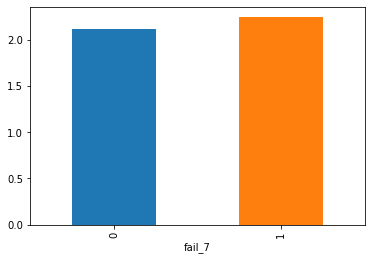

avg_volt_change_charging


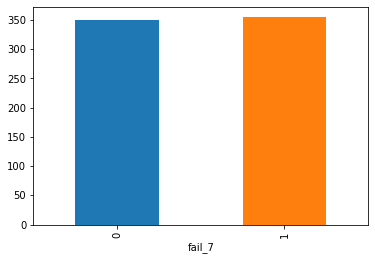

avg_volt_change_discharging


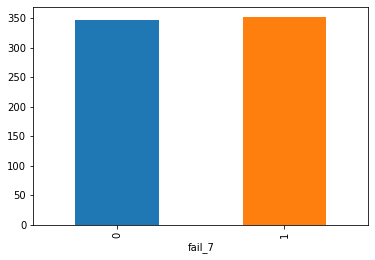

avg_time_charging


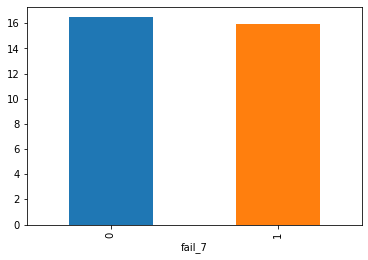

avg_time_discharging


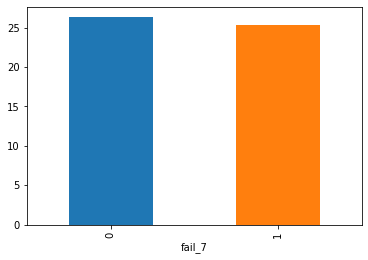

max_voltage_day


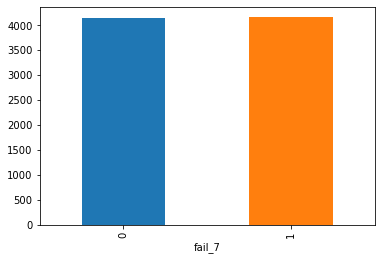

piececount


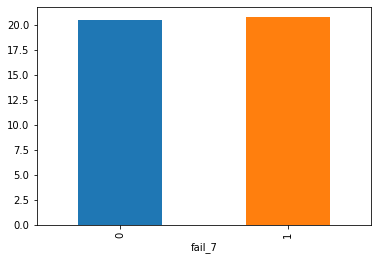

cycle_time


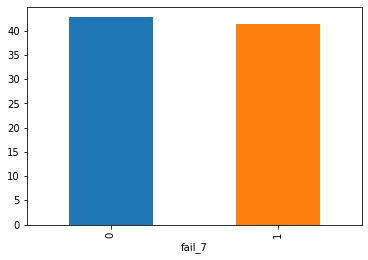

LastRecord


DataError: No numeric types to aggregate

In [22]:
for feat in tr.columns:
    print(feat)
    tr.groupby('fail_7')[feat].mean().plot(kind='bar', label='index',color=['C0', 'C1'])# colormap='Paired')#.bar()
    plt.show()